In [54]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [55]:
data = pd.read_csv("data.csv", sep = ";")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [56]:
continuous_cols = [
    "Admission grade", "Unemployment rate", "Inflation rate", "GDP"
]
for col in continuous_cols:
    data[col] = (data[col] - data[col].mean()) / data[col].std()

for col in data.columns:
    if col not in continuous_cols and col != "Target":
        data[col] /= data[col].max()
    
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0.166667,0.298246,0.555556,0.017115,1.0,0.023256,0.642105,0.009174,0.431818,0.272727,...,0.0,0.00000,0.000000,0.00,0.000000,0.0,-0.287606,0.124372,0.765674,Dropout
1,0.166667,0.263158,0.111111,0.926234,1.0,0.023256,0.842105,0.009174,0.022727,0.068182,...,0.0,0.26087,0.181818,0.30,0.735897,0.0,0.876123,-1.105097,0.347160,Graduate
2,0.166667,0.017544,0.555556,0.907817,1.0,0.023256,0.642105,0.009174,0.840909,0.840909,...,0.0,0.26087,0.000000,0.00,0.000000,0.0,-0.287606,0.124372,0.765674,Dropout
3,0.166667,0.298246,0.222222,0.978180,1.0,0.023256,0.642105,0.009174,0.863636,0.840909,...,0.0,0.26087,0.303030,0.25,0.667692,0.0,-0.813161,-1.466705,-1.375356,Graduate
4,0.333333,0.684211,0.111111,0.802122,0.0,0.023256,0.526316,0.009174,0.840909,0.863636,...,0.0,0.26087,0.181818,0.30,0.700000,0.0,0.876123,-1.105097,0.347160,Graduate


### Assignment 1 (4 scores):

- Use Numpy only to construct the Logistic Regression model.
- Train that Logistic Regression model dataset using the Gradient Descend approach on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset. *Note that three class in this dataset must be merge into two class as: graduate and non-graduate (dropout or enroll)*.
- Evaluate that Logistic Regression model on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Visualize the loss function of the training process.

In [57]:
def encode_target(value: str) -> int:
    if value == "Enroll" or value == "Dropout":
        return 0 #Non-graduate
    else: return 1 #Graduate

In [58]:
data_log = data.copy()
data_log["Target"] = data_log["Target"].apply(encode_target)
data_log.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0.166667,0.298246,0.555556,0.017115,1.0,0.023256,0.642105,0.009174,0.431818,0.272727,...,0.0,0.00000,0.000000,0.00,0.000000,0.0,-0.287606,0.124372,0.765674,0
1,0.166667,0.263158,0.111111,0.926234,1.0,0.023256,0.842105,0.009174,0.022727,0.068182,...,0.0,0.26087,0.181818,0.30,0.735897,0.0,0.876123,-1.105097,0.347160,1
2,0.166667,0.017544,0.555556,0.907817,1.0,0.023256,0.642105,0.009174,0.840909,0.840909,...,0.0,0.26087,0.000000,0.00,0.000000,0.0,-0.287606,0.124372,0.765674,0
3,0.166667,0.298246,0.222222,0.978180,1.0,0.023256,0.642105,0.009174,0.863636,0.840909,...,0.0,0.26087,0.303030,0.25,0.667692,0.0,-0.813161,-1.466705,-1.375356,1
4,0.333333,0.684211,0.111111,0.802122,0.0,0.023256,0.526316,0.009174,0.840909,0.863636,...,0.0,0.26087,0.181818,0.30,0.700000,0.0,0.876123,-1.105097,0.347160,1


In [59]:
class MyLogisticReg:
    def __init__(self, lr = 0.01, num_epochs = 100):
        self.lr = lr
        self.num_epochs = num_epochs
        self.losses = []
        self.accuracies = []
        
    def loss_func(self,  y, y_hat):
        return (-(y*np.log(y_hat + 1e-9) + (1-y)*np.log(1-y_hat + 1e-9))).mean()
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def accuracy(self, y, y_hat):
        y_pred = (y_hat >= 0.5).astype(int)
        return np.mean(y == y_pred)
    
    def fit(self, x_train, y_train):
        y_train = y_train.reshape(-1, 1)
        n_samples, n_features = x_train.shape
        self.theta = np.zeros((n_features, 1)) #(d,1)
        
        with tqdm(range(self.num_epochs)) as pb:
            for epoch in pb:
                #Forward
                pb.set_description(f"Epoch {epoch + 1}")
                y_hat = self.predict(x_train) #(n, 1)
                
                #Backward
                gradient = 1.0/n_samples * (x_train.T @ (y_hat - y_train)) #(d,1)
                self.theta -= self.lr * gradient
                
                y_hat = self.predict(x_train)
                loss = self. loss_func(y_train, y_hat)
                acc = self.accuracy(y_train, y_hat)
                pb.set_postfix({
                    "loss" : loss,
                    "accuracy" : acc
                })
                
                self.losses.append(loss)
                self.accuracies.append(acc)
                               
    def predict(self, x_test):
        z = x_test @ self.theta
        y_hat = self.sigmoid(z)
        
        return y_hat

In [60]:
X = np.array(data_log.drop("Target", axis = 1))
y = np.array(data_log["Target"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 23520442)

In [61]:
my_log = MyLogisticReg(0.01, 1000)
my_log.fit(X_train, y_train)

Epoch 1000: 100%|██████████| 1000/1000 [00:03<00:00, 324.40it/s, loss=0.489, accuracy=0.766]


In [62]:
y_pred = my_log.predict(X_test)
print("Accuracy: ", my_log.accuracy(y_test, y_pred))

Accuracy:  0.6296990009256599


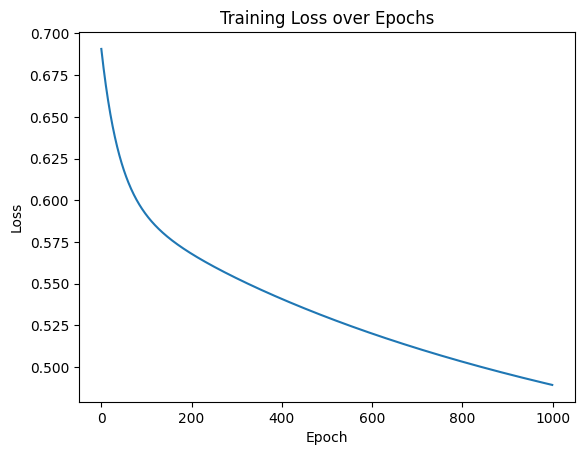

In [63]:
sns.lineplot(x=range(len(my_log.losses)), y=my_log.losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


### Assignment 2 (4 scores):

- Use Numpy only to construct the Sofmax Regression model.
- Train that Logistic Regression model dataset using the Gradient Descend approach on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Evaluate that Logistic Regression model on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Visualize the loss function of the training process.

In [64]:
def encode_target(value: str) -> int:
    if value == "Dropout":
        return 0
    if value == "Enrolled":
        return 1
    return 2

In [65]:
data_softmax = data.copy()
data_softmax["Target"] = data["Target"].apply(encode_target)
data_softmax.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0.166667,0.298246,0.555556,0.017115,1.0,0.023256,0.642105,0.009174,0.431818,0.272727,...,0.0,0.00000,0.000000,0.00,0.000000,0.0,-0.287606,0.124372,0.765674,0
1,0.166667,0.263158,0.111111,0.926234,1.0,0.023256,0.842105,0.009174,0.022727,0.068182,...,0.0,0.26087,0.181818,0.30,0.735897,0.0,0.876123,-1.105097,0.347160,2
2,0.166667,0.017544,0.555556,0.907817,1.0,0.023256,0.642105,0.009174,0.840909,0.840909,...,0.0,0.26087,0.000000,0.00,0.000000,0.0,-0.287606,0.124372,0.765674,0
3,0.166667,0.298246,0.222222,0.978180,1.0,0.023256,0.642105,0.009174,0.863636,0.840909,...,0.0,0.26087,0.303030,0.25,0.667692,0.0,-0.813161,-1.466705,-1.375356,2
4,0.333333,0.684211,0.111111,0.802122,0.0,0.023256,0.526316,0.009174,0.840909,0.863636,...,0.0,0.26087,0.181818,0.30,0.700000,0.0,0.876123,-1.105097,0.347160,2


In [66]:
X = np.array(data_softmax.drop("Target", axis = 1))
y = np.array(data_softmax["Target"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 23520442)
n_classes = len(np.unique(y))
y_train_oh = np.eye(n_classes)[y_train]
y_test_oh = np.eye(n_classes)[y_test]

In [67]:
class MySoftmax:
    def __init__(self, lr = 0.01, num_epochs = 1000):
        self.num_epochs = num_epochs
        self.lr = lr
        self.losses = []
        self.accuracies = []
        
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis = 1, keepdims=True)
    
    def accuracy(self, y, y_hat):
        y_pred = np.argmax(y_hat, axis = 1)
        y_true = np.argmax(y, axis=1)
        return np.mean(y_pred == y_true)
    
    def loss_func(self, y, y_hat):
        return -(y * np.log(y_hat + 1e-9)).sum(axis = 1).mean()
    
    def fit(self, x_train, y_train):
        n_samples, n_features = x_train.shape
        n_classes = y_train.shape[1]
        self.theta = np.zeros((n_features, n_classes))
        
        with tqdm(range(self.num_epochs)) as pb:
            for epoch in pb:
                pb.set_description(f"Epoch {epoch + 1}")
                y_hat = self.predict(x_train)
                gradient = 1.0/n_samples * (x_train.T @ (y_hat - y_train))
                self.theta -= self.lr * gradient
                
                y_hat = self.predict(x_train)
                loss = self. loss_func(y_train, y_hat)
                acc = self.accuracy(y_train, y_hat)

                pb.set_postfix({
                    "loss" : loss,
                    "accuracy" : acc
                })
                
                self.losses.append(loss)
                self.accuracies.append(acc)
                
    def predict(self, x_test):
        z = x_test @ self.theta
        y_hat = self.softmax(z)
        
        return y_hat

In [68]:
my_soft = MySoftmax(0.01, 1000)
my_soft.fit(X_train, y_train_oh)

Epoch 1000: 100%|██████████| 1000/1000 [00:03<00:00, 263.45it/s, loss=0.818, accuracy=0.686]


In [69]:
y_pred = my_soft.predict(X_test)
print("Accuracy: ", my_soft.accuracy(y_test_oh, y_pred))

Accuracy:  0.6519774011299435


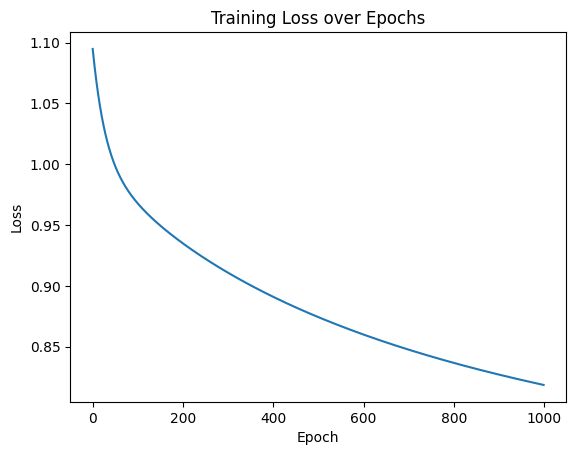

In [70]:
sns.lineplot(x=range(len(my_soft.losses)), y=my_soft.losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


### Assignment 3 (2 scores):

- Use a Machine Learning library (Scikit Learn or Skorch) to implement and evaluate the Logistic Regression on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Use a Machine Learning library (Scikit Learn or Skorch) to implement and evaluate the Softmax Regression on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.

In [77]:
X = np.array(data_log.drop("Target", axis = 1))
y = np.array(data_log["Target"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 23520442)

In [78]:
logis_reg = LogisticRegression(max_iter=1000)
logis_reg.fit(X_train, y_train)

y_pred = logis_reg.predict(X_test)
acc = np.mean(y_pred == y_test)
print("Accuracy: ", acc)

Accuracy:  0.8700564971751412


In [73]:
X = np.array(data_softmax.drop("Target", axis = 1))
y = np.array(data_softmax["Target"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 23520442)

In [74]:
softmax = LogisticRegression(max_iter=1000)
softmax.fit(X_train, y_train)

y_pred = softmax.predict(X_test)
acc = np.mean(y_pred == y_test)
print("Accuracy: ", acc)

Accuracy:  0.7661016949152543
